In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/04.%20Week%204/compas_scores_two_years/compas-scores-two-years.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [3]:
print(df.head())

   id                name   first         last compas_screening_date   sex  \
0   1    miguel hernandez  miguel    hernandez            2013-08-14  Male   
1   3         kevon dixon   kevon        dixon            2013-01-27  Male   
2   4            ed philo      ed        philo            2013-04-14  Male   
3   5         marcu brown   marcu        brown            2013-01-13  Male   
4   6  bouthy pierrelouis  bouthy  pierrelouis            2013-03-26  Male   

          dob  age          age_cat              race  ...  v_decile_score  \
0  1947-04-18   69  Greater than 45             Other  ...               1   
1  1982-01-22   34          25 - 45  African-American  ...               1   
2  1991-05-14   24     Less than 25  African-American  ...               3   
3  1993-01-21   23     Less than 25  African-American  ...               6   
4  1973-01-22   43          25 - 45             Other  ...               1   

   v_score_text  v_screening_date  in_custody  out_custody  pr

In [4]:
print(df.describe().T)

                          count         mean          std    min      25%  \
id                       7214.0  5501.255753  3175.706870    1.0  2735.25   
age                      7214.0    34.817993    11.888922   18.0    25.00   
juv_fel_count            7214.0     0.067230     0.473972    0.0     0.00   
decile_score             7214.0     4.509565     2.856396    1.0     2.00   
juv_misd_count           7214.0     0.090934     0.485239    0.0     0.00   
juv_other_count          7214.0     0.109371     0.501586    0.0     0.00   
priors_count             7214.0     3.472415     4.882538    0.0     0.00   
days_b_screening_arrest  6907.0     3.304763    75.809505 -414.0    -1.00   
c_days_from_compas       7192.0    57.731368   329.740215    0.0     1.00   
is_recid                 7214.0     0.481148     0.499679    0.0     0.00   
r_days_from_arrest       2316.0    20.269430    74.871668   -1.0     0.00   
violent_recid               0.0          NaN          NaN    NaN      NaN   

In [5]:
print(df.isnull().sum())

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [6]:
print("\nJumlah Nilai Unik per Kolom:")
for kolom in df.columns:
    print(f"{kolom}: {df[kolom].nunique()}")


Jumlah Nilai Unik per Kolom:
id: 7214
name: 7158
first: 2800
last: 3950
compas_screening_date: 690
sex: 2
dob: 5452
age: 65
age_cat: 3
race: 6
juv_fel_count: 11
decile_score: 10
juv_misd_count: 10
juv_other_count: 10
priors_count: 37
days_b_screening_arrest: 423
c_jail_in: 6907
c_jail_out: 6880
c_case_number: 7192
c_offense_date: 927
c_arrest_date: 580
c_days_from_compas: 499
c_charge_degree: 2
c_charge_desc: 437
is_recid: 2
r_case_number: 3471
r_charge_degree: 10
r_days_from_arrest: 201
r_offense_date: 1075
r_charge_desc: 340
r_jail_in: 972
r_jail_out: 938
violent_recid: 0
is_violent_recid: 2
vr_case_number: 819
vr_charge_degree: 9
vr_offense_date: 570
vr_charge_desc: 83
type_of_assessment: 1
decile_score.1: 10
score_text: 3
screening_date: 690
v_type_of_assessment: 1
v_decile_score: 10
v_score_text: 3
v_screening_date: 690
in_custody: 1156
out_custody: 1169
priors_count.1: 37
start: 237
end: 1115
event: 2
two_year_recid: 2


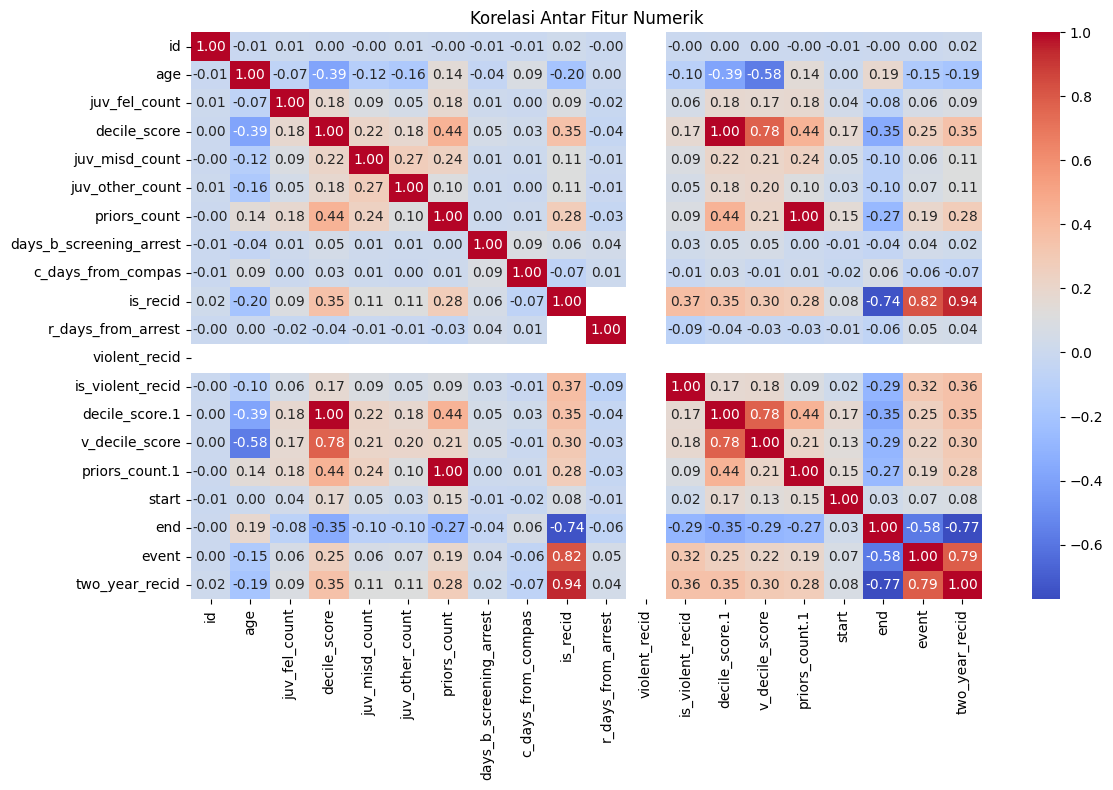

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.tight_layout()
plt.show()

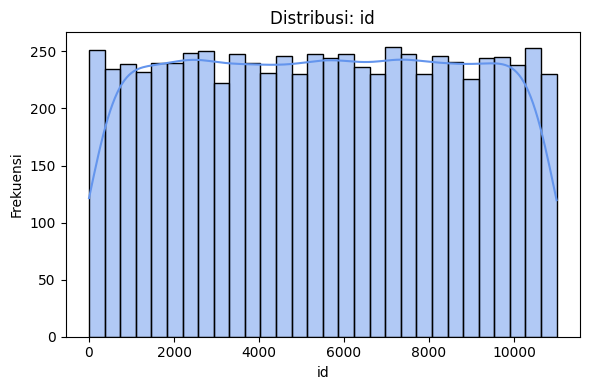

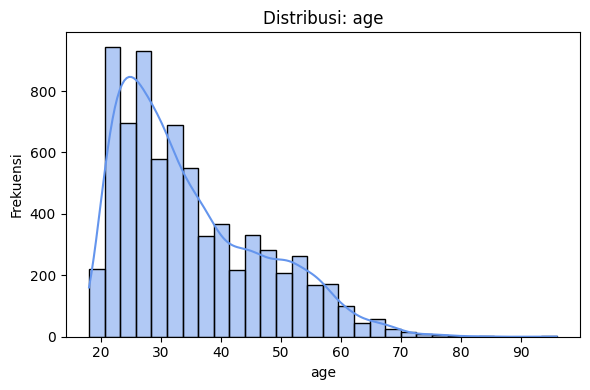

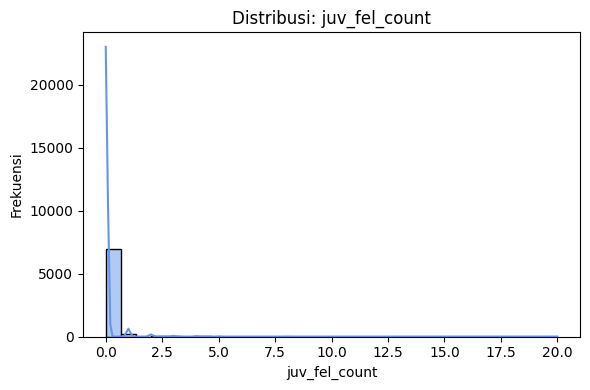

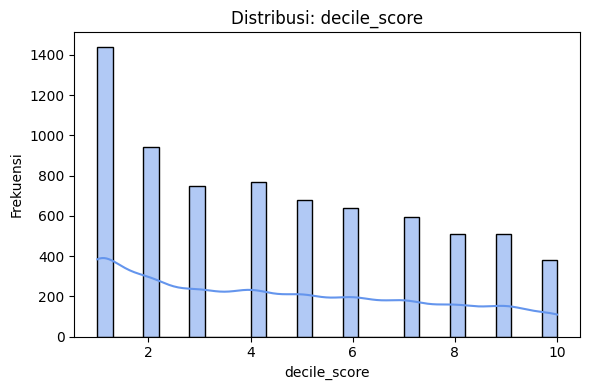

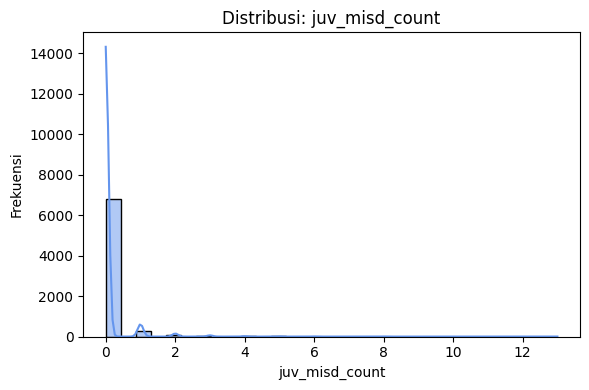

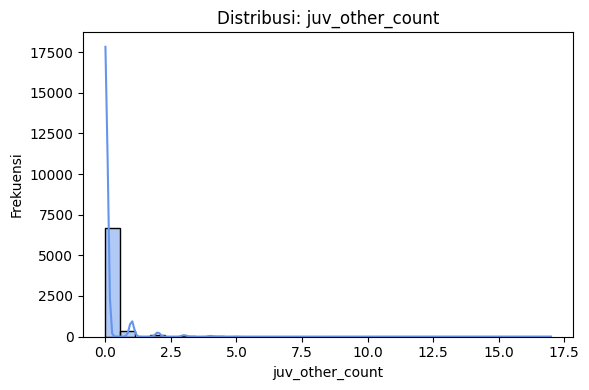

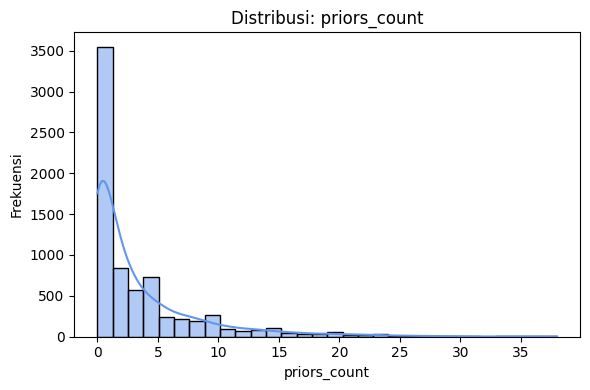

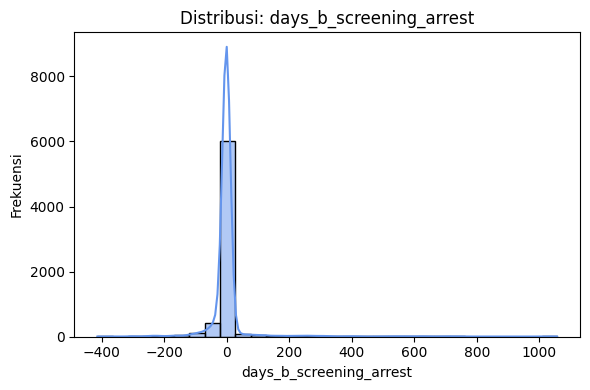

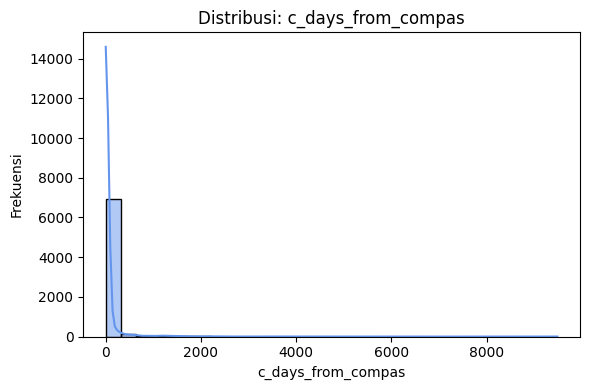

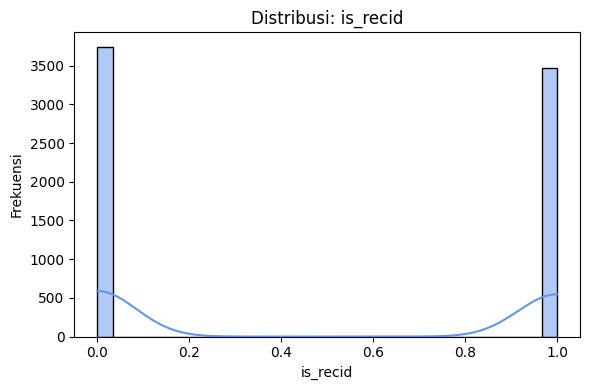

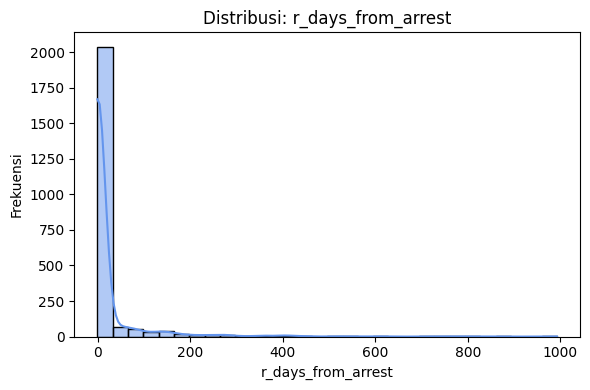

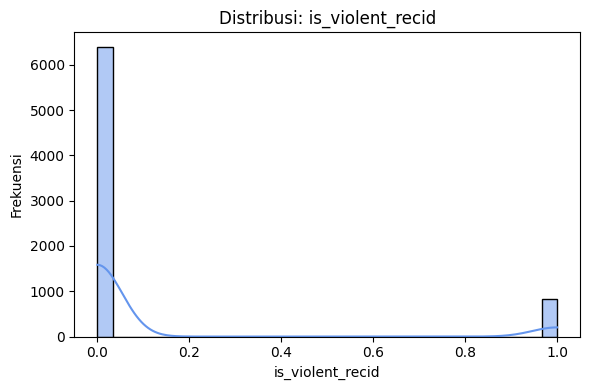

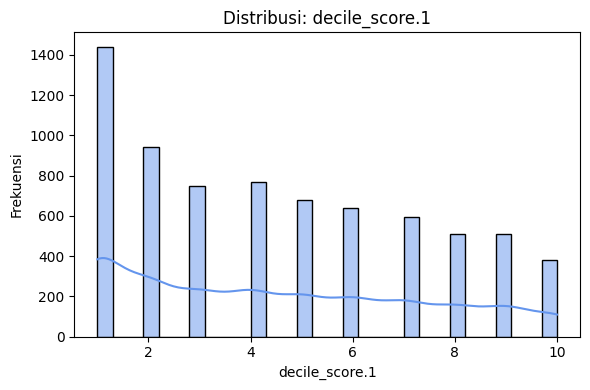

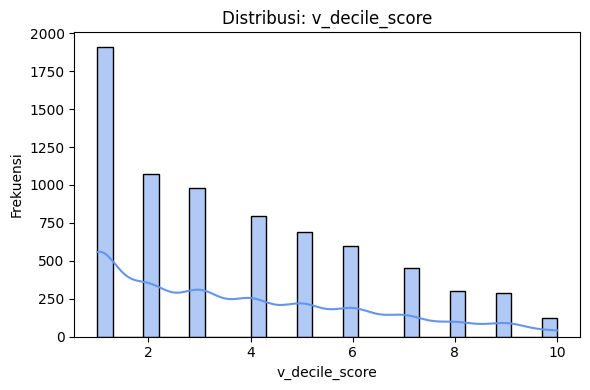

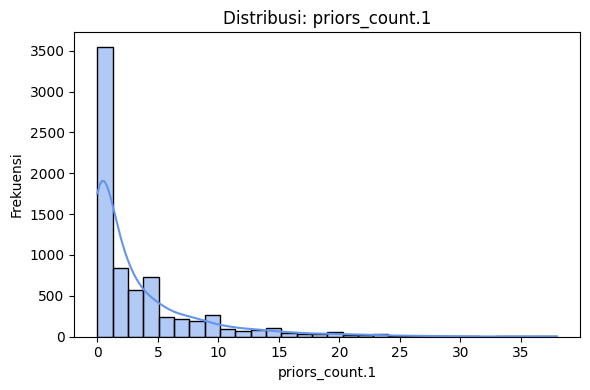

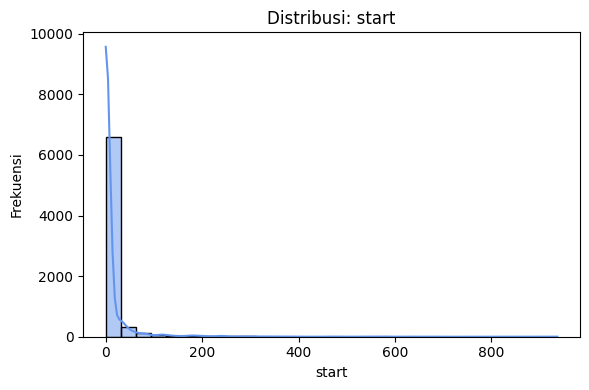

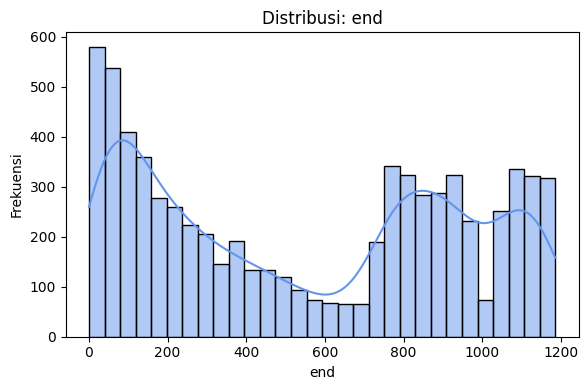

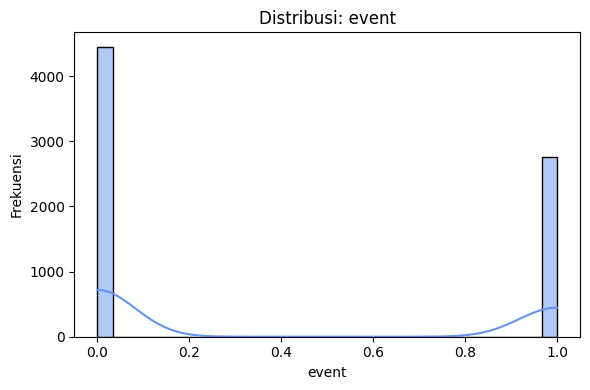

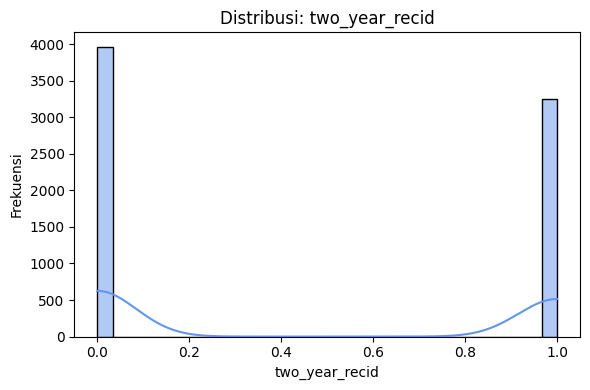

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for kol in num_cols:
    if df[kol].nunique() <= 1:
        continue
    plt.figure(figsize=(6, 4))
    sns.histplot(df[kol].dropna(), bins=30, kde=True, color='cornflowerblue')
    plt.title(f'Distribusi: {kol}')
    plt.xlabel(kol)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

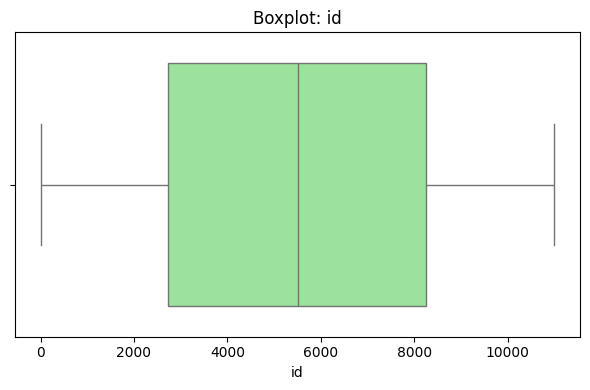

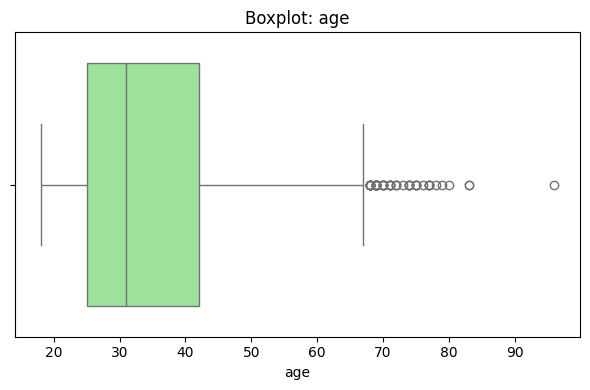

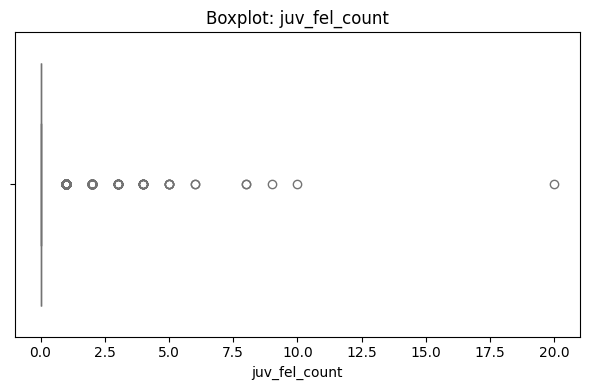

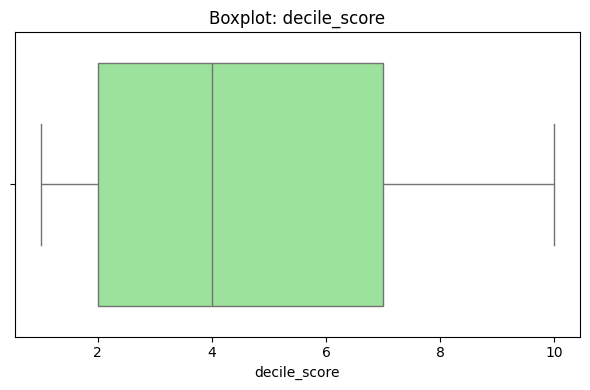

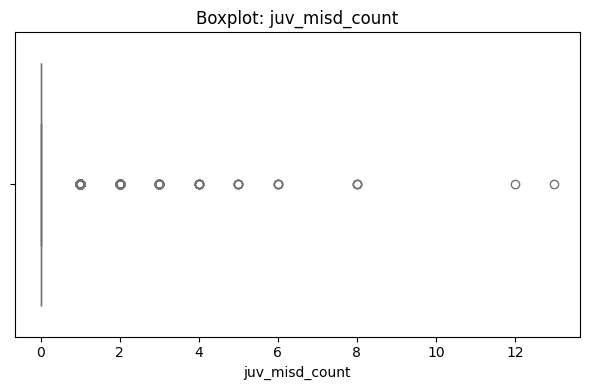

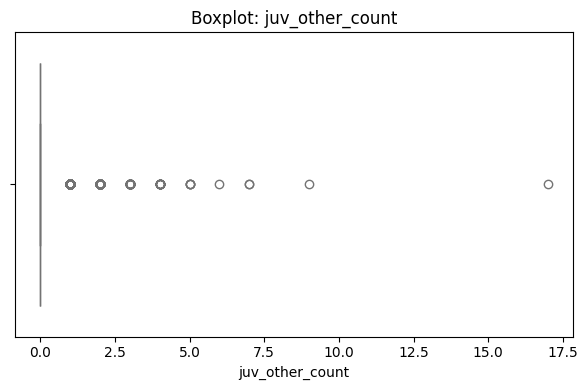

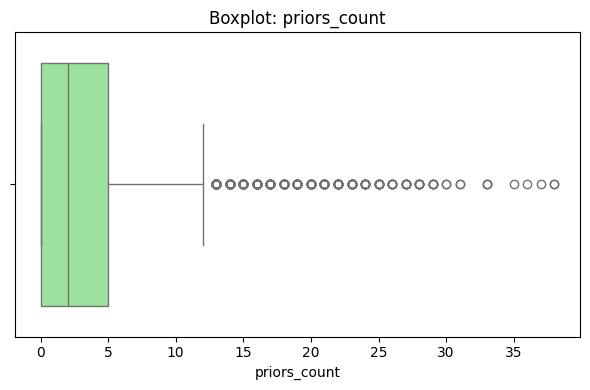

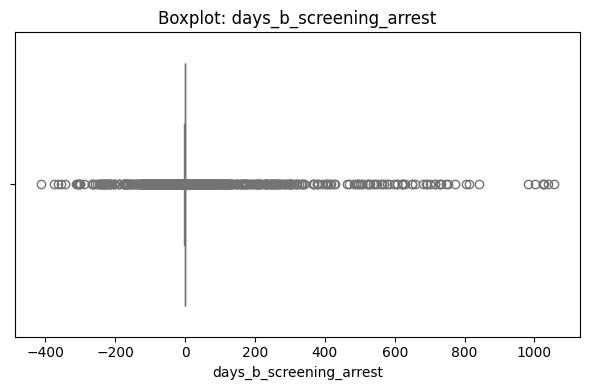

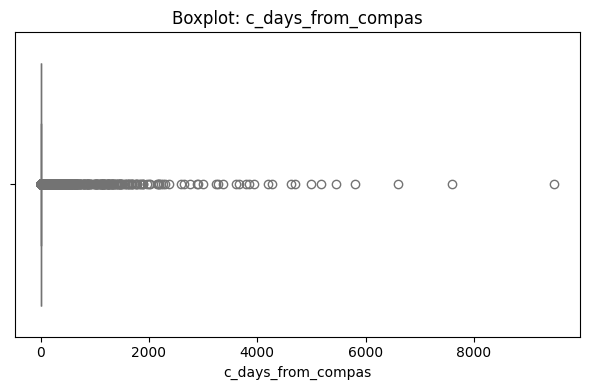

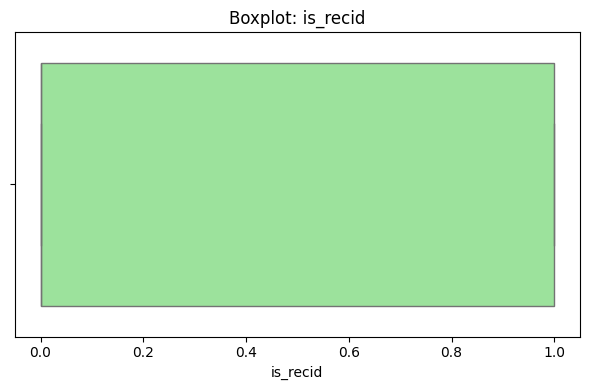

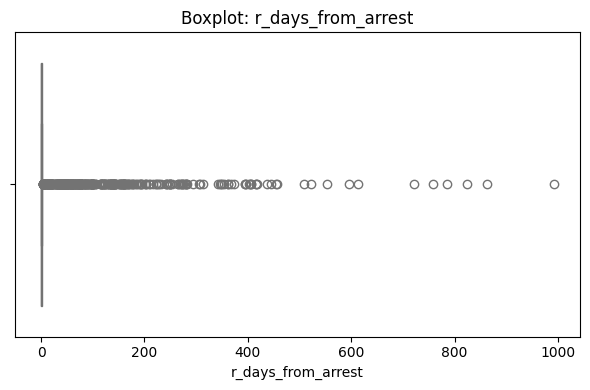

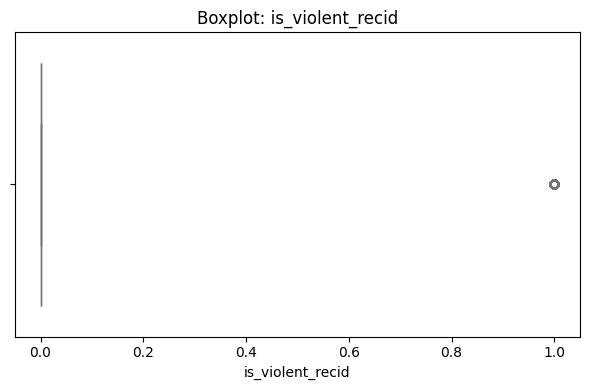

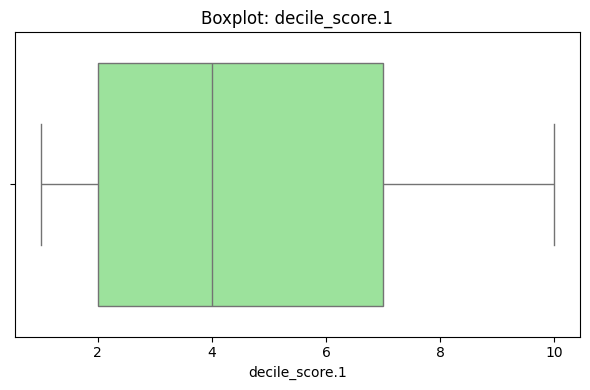

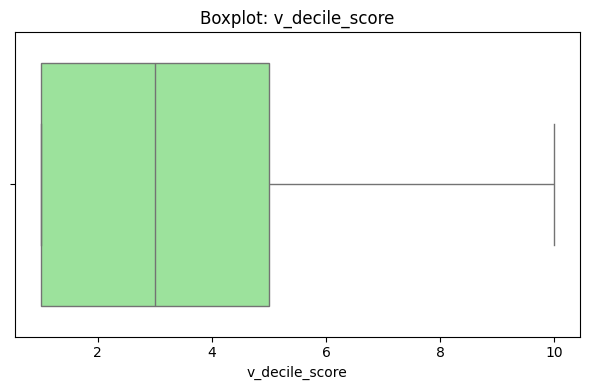

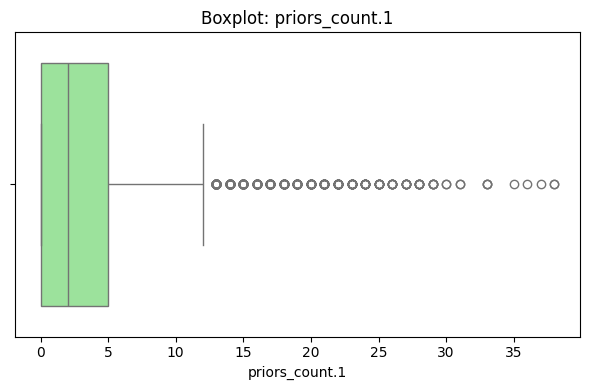

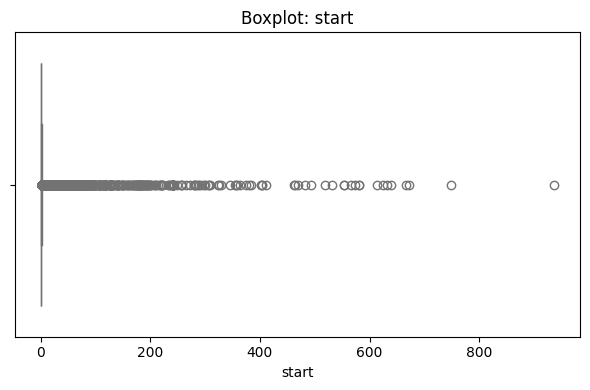

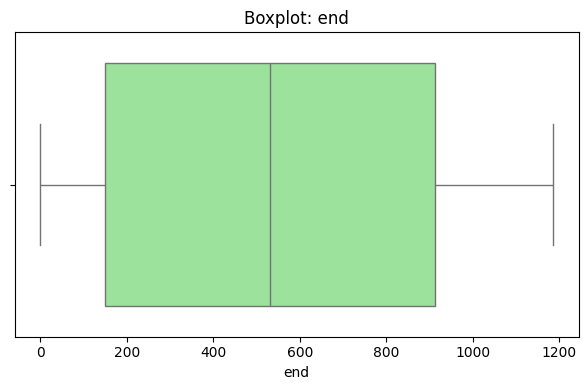

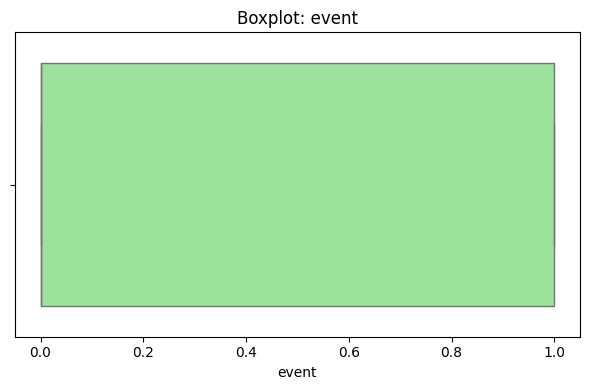

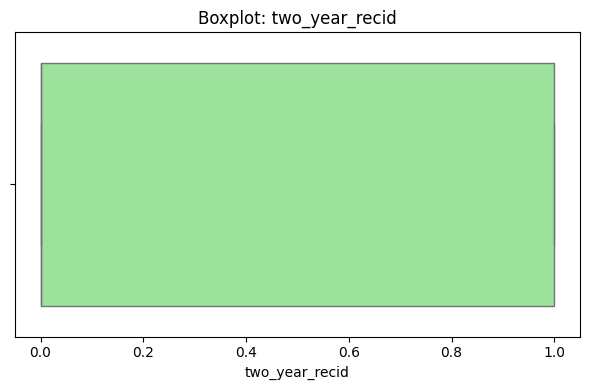

In [11]:
for kol in num_cols:
    if df[kol].nunique() <= 1:
        continue
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[kol], color='lightgreen')
    plt.title(f'Boxplot: {kol}')
    plt.tight_layout()
    plt.show()

In [12]:
high_cardinality = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 100]
df = df.drop(columns=high_cardinality)

cat_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df.fillna(df.median(numeric_only=True), inplace=True)

df.dropna(axis=1, how='any', inplace=True)
df = df.loc[:, df.nunique() > 1]

print("\nDataset Setelah Encoding & Clean-up:", df.shape)


Ukuran Dataset Setelah Encoding & Clean-up: (7214, 131)


In [15]:
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuration : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC : {auc:.4f}")

Accuration : 0.9868
Precision : 0.9762
Recall : 0.9935
F1 Score : 0.9848
AUC : 0.9976


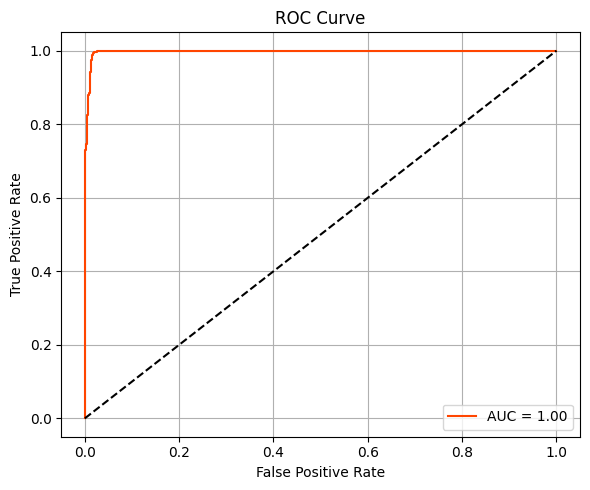

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='orangered')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **1. Accuracy (Akurasi)**
Accuracy mengukur seberapa sering model melakukan prediksi yang benar (baik benar positif maupun benar negatif) dibandingkan dengan total prediksi.

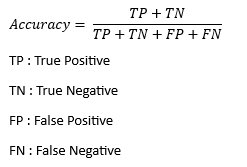

# **2. Precision (Presisi)**
Precision mengukur seberapa akurat model dalam memprediksi kelas positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua prediksi positif (True Positives + False Positives).

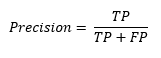

# **3. Recall (Sensitivity atau True Positive Rate)**
Recall mengukur seberapa baik model dapat mengidentifikasi semua instance positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua instance positif yang sebenarnya (True Positives + False Negatives).

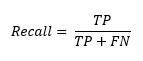

# **4. F1-Score**
F1-Score adalah harmonic mean dari Precision dan Recall. Ini memberikan keseimbangan antara Precision dan Recall.

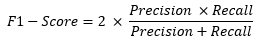

# **5. AUC (Area Under Curve)**

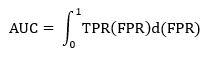


AUC adalah area di bawah kurva ROC. Nilainya berkisar antara 0 dan 1:
*   AUC = 1: Model sempurna.
*   AUC = 0.5: Model tidak lebih baik dari tebakan acak.
*   AUC < 0.5: Model performanya buruk.

# **6. ROC Curve (Receiver Operating Characteristic)**
Kurva ROC adalah plot antara True Positive Rate (TPR) vs False Positive Rate (FPR):

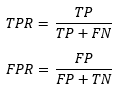

Semakin tinggi TPR dan semakin rendah FPR, semakin baik modelnya. Kurva yang mendekati sudut kiri atas berarti performa model sangat baik.